## **Setting Up**

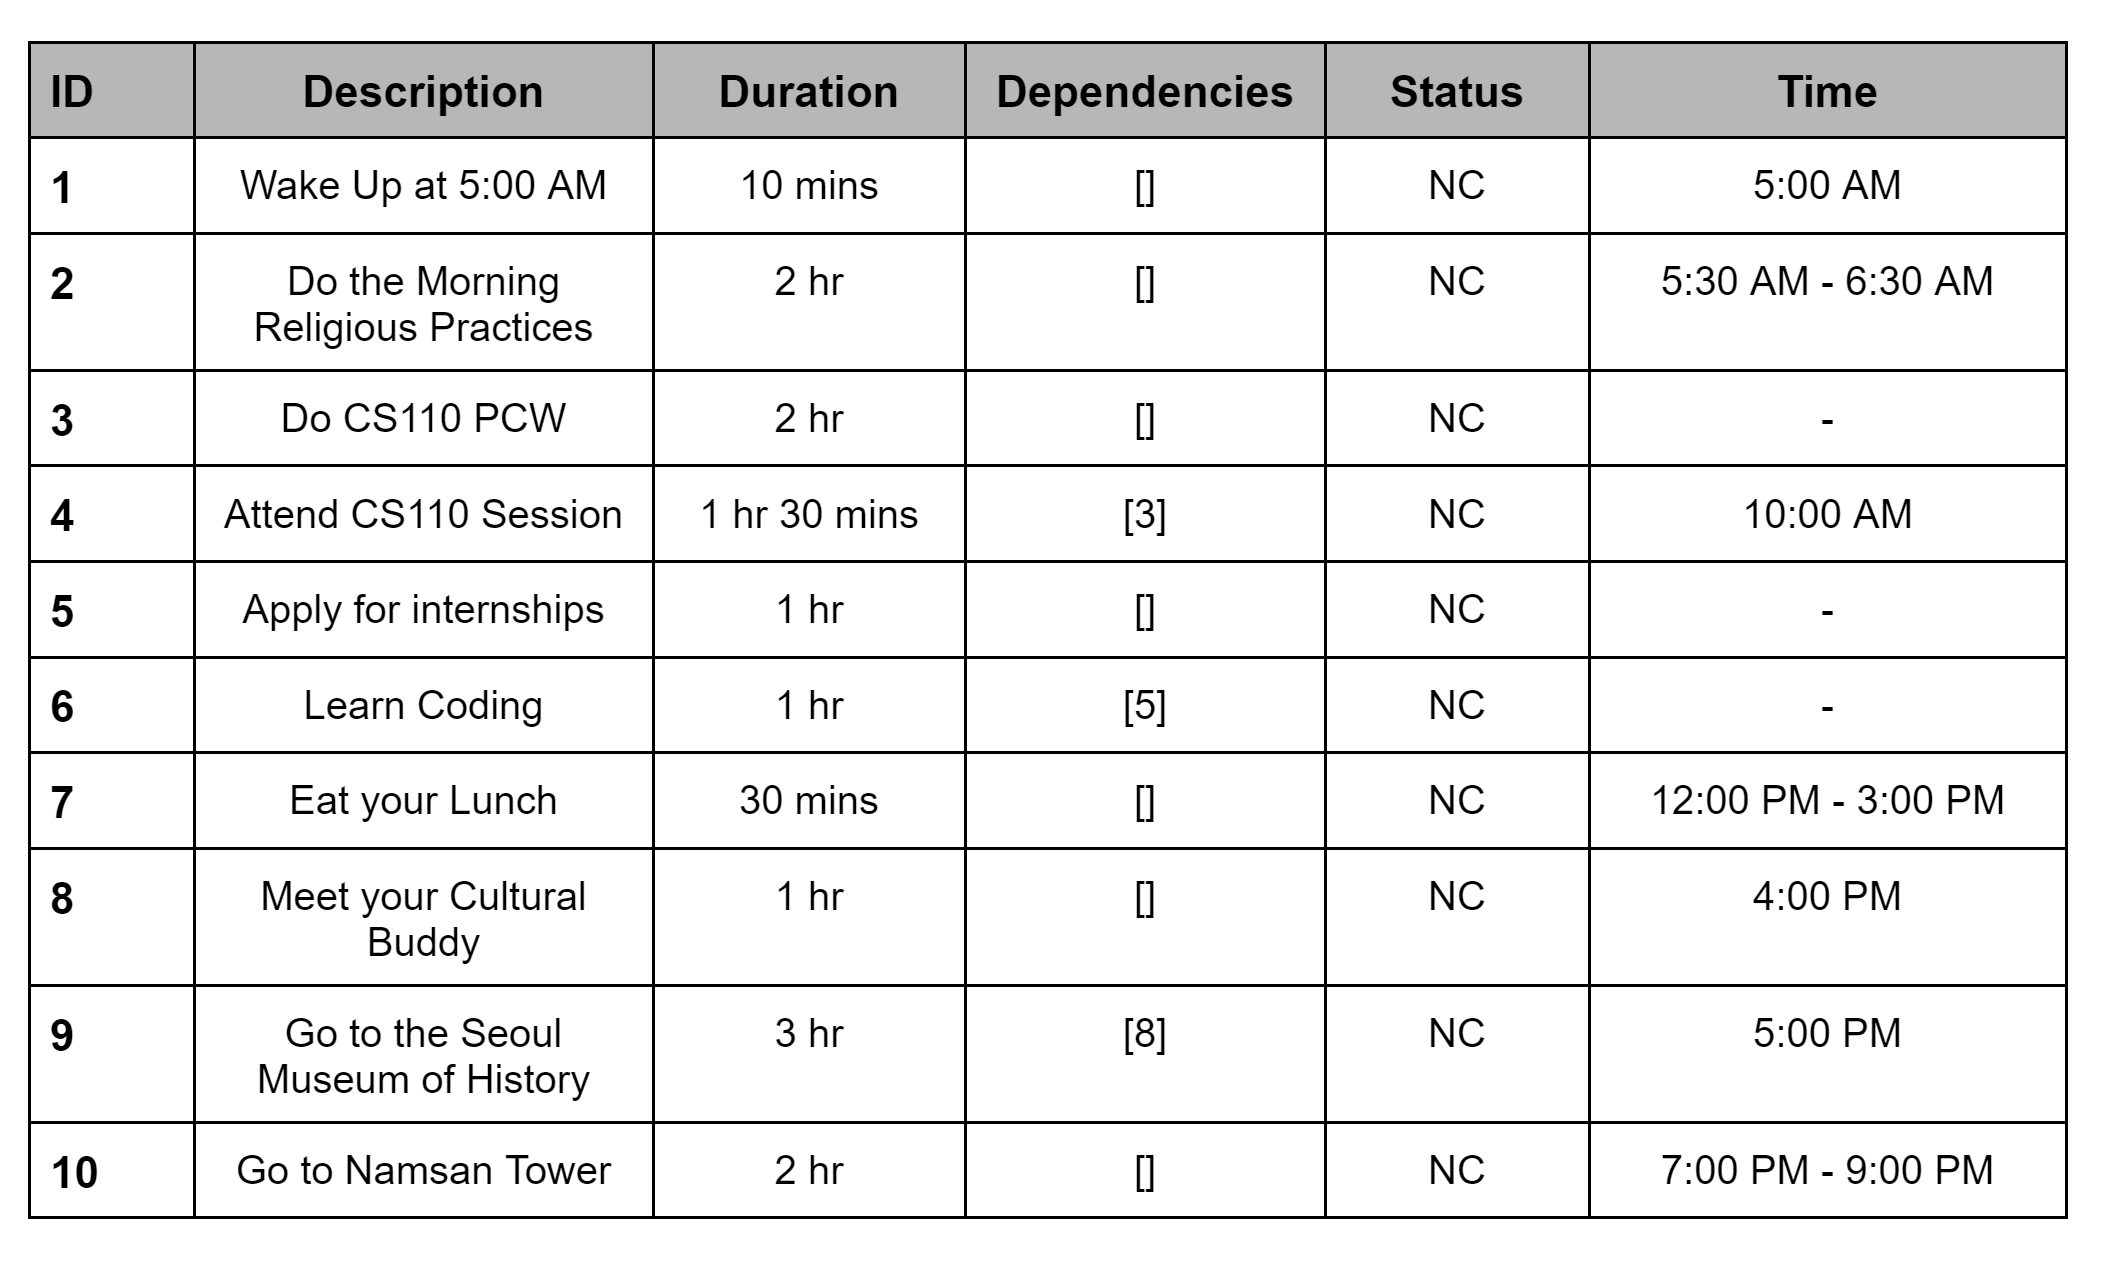
Before implementing a scheduler, we have to understand what tasks a typical day has. Based on my experience, I would categorize the tasks into four:


*   **Flexible**: It is a task that doesn't have a specified start time. You can do the task anytime in the day. On a typical day, I can learn coding and apply to internships (task 5 and task 6) because these tasks are not tied to an appointment or time range. The timing of flexible tasks is dependent on how other tasks are prioritized.
*   **Dependency**: It is the same as the flexible task, but it has to be done before another task as a prerequisite. For example, I must do CS110 PCW before attending the CS110 Session. In other words, task 3 must be done before task 4.


*   **Fixed**: It is a task that must be done at a specified time. As shown in task 8, I must meet with my cultural buddy at 4:00 p.m. Although task 8 can be a dependency of task 9, we assume dependencies are the same as flexible tasks, without time constraints, so we consider it as a fixed task since it should be done at 4:00 p.m.


*   **Window**: It is a task that must be done in a specific time range. For instance, I can have lunch anytime between 1:00 p.m. and 3:00 p.m. The benefit of window tasks is the ability to do flexible tasks during their time range. In the schedule above, I can learn coding and apply for internships till 2:30 p.m. and have my lunch at 2:30 p.m.


  Distinguishing between tasks creates the roadmap for how we can prioritize the tasks. The fixed and window tasks are the skeleton of the scheduler. All other tasks should be scheduled according to how time-constrained tasks were set. For example, attending a CS110 session is a fixed task that has one dependence on task 3. Shifting the time of the CS110 session will affect when task 3 should be completed. Another example is decreasing the time range of having lunch to 1:00 p.m. instead of 3:00 p.m. It affects our ability to learn to code because it takes 1hr 30 min, so it exceeds the window of having lunch since the “Applying to Internships” task ends at 12:30 a.m. (12:30 a.m. + 1hr = 1:30 p.m.> 1:00 p.m.). Generally, we prioritize the earlier tasks and their dependencies, then schedule other tasks based on the time gaps available.














## **Priority Queue vs Sorted List**

Choosing a priority queue over a sorted list for scheduling tasks is more efficient in terms of time complexity. Let's assume we have an unsorted list of all priority values, and we need to find the task with the highest priority values. We can use three algorithms for finding the maximum value:

1. Iterate over the entire list and update the max variable if you find an element higher than the max variable. Once we find the task with the highest priority value, we have to remove the task from the list, which takes O(n). Doing so for every element, we will end up with an algorithm of O(n^2) since we have to search for the value (O(n)) and remove it from the list (O(n)) (O(n) * O(n) = O(n^2))


2. Sort the entire list ascendingly and query the last value. Assuming we are using the best sorting algorithm, the sorting algorithm takes O(nlog(n)), and querying is O(1). Popping the last value after we finish the task is also O(1). Overall, the time complexity using the sorting algorithm is O(n*log(n))



3. Create a max heap and use the heapify method for converting the unsorted list to a max heap. The heapify method takes an O(n) operation to build the heap. Querying the maximum value in the max heap is O(1) because it always maintains the maximum value in the root element, while deleting the maximum value is log(n). Since we have to delete n elements, the overall time complexity of the algorithm is O(nlog(n)).



The complexity analysis shows using a priority queue has the same complexity as sorting a list. However, we have yet to consider adding new tasks to the scheduler. Using the sorting algorithm, insertion takes O(n) since we have to position the element in the correct order. In contrast, the priority queue takes O(log(n)) for insertion because it has to do log(n) swaps for inserting a new maximum value, which is dependent on the depth of the heap. Therefore, a priority queue is a better data structure for designing a scheduler.

## **Using Priority Queues**




Since we have time-constrained and flexible tasks, we need more than one priority queue because we can't model both tasks in one priority value. The priority value for time-constrained is the time itself, while the priority value for flexible tasks is dependent on the utility of the task. The utility is a subjective evaluation of the task's importance. For example, I prefer to do the shorter tasks first, while others may prefer tasks with less dependencies. Given that, we have to use two priority queues: one for time-constrained tasks and one for flexible tasks. Let's call them timed_queue and flexible_queue. The time_queue prioritizes utility based on their time; it prioritizes the earlier tasks with their dependencies. The flexible_queue prioritizes the flexible tasks based on their utility. Generally, the timed_queue is more prioritized over the flexible_queue. If we are done with timed tasks, we look into the flexible tasks. For example, if I have a CS110 session at 10:00 a.m., I can't do a flexible task that takes 1 hour at 9:30 a.m. because it will overlap with the fixed task. That is how I will aim to build the scheduler.

## **Intuition Behind Algorithm**

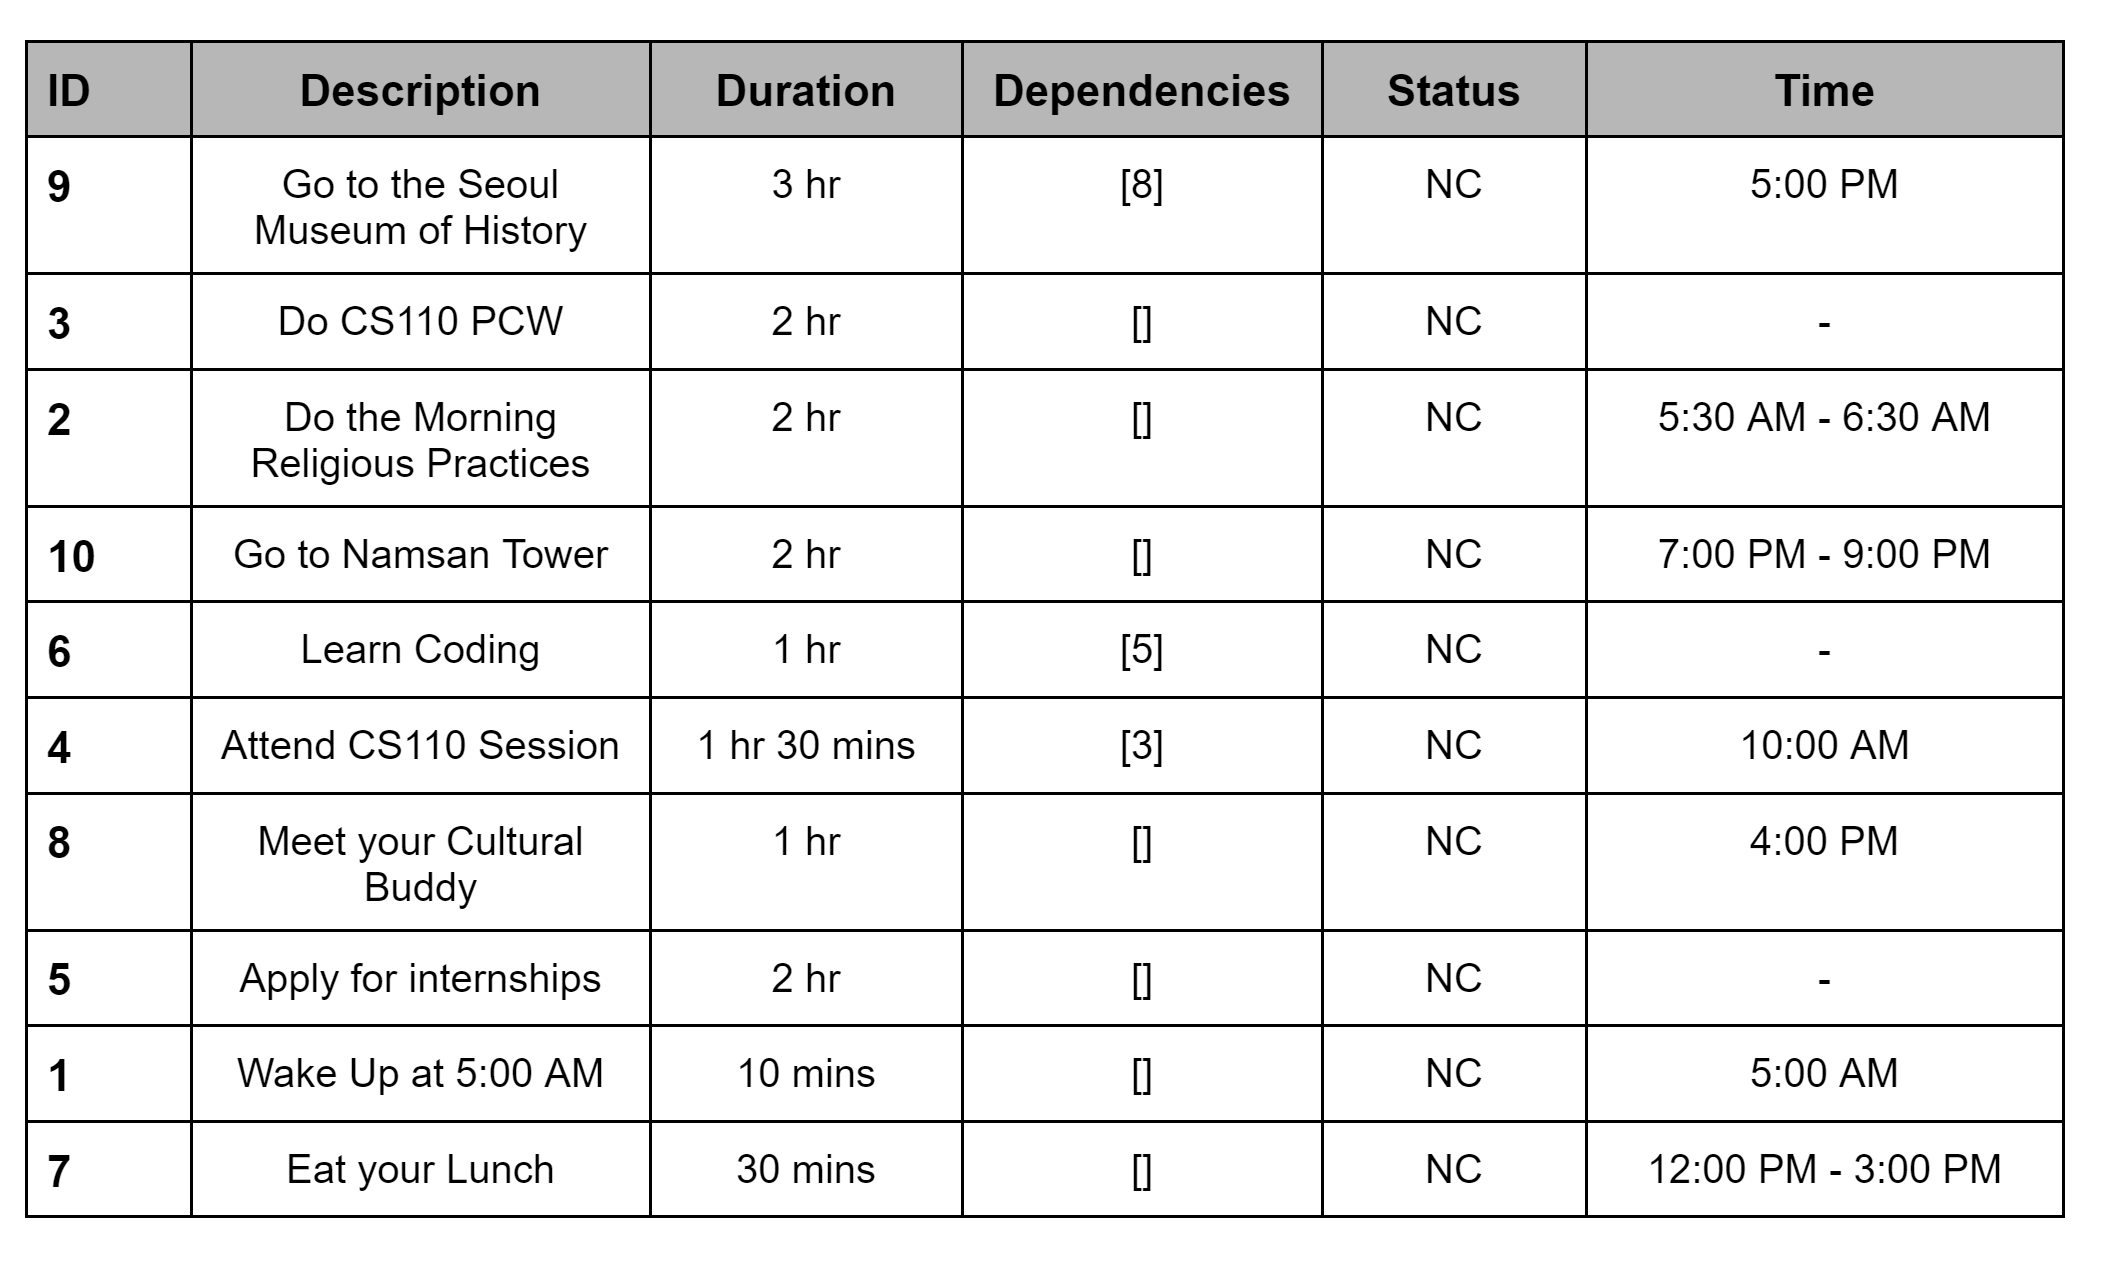
Let's say we have shuffled the initial task schedule, and we need to sort it again, as shown in the table above. We will create two lists: one for timed tasks and another for flexible tasks. In the timed tasks list, we will add the start times for time-constrained tasks. The dependencies will be included in timed tasks list and have a lower value than its parent task. Our timed list will be [17, 5.5, 19, 9.9, 10, 16, 5,12]. These times are written in 24-hour format. We can observe that "9.9" is not the start time of any task. The "Attend CS110 Session" task is dependent on "Do CS110 PCW"; it must be given a lower value than its parent task, which means it must be executed first. We assume the smaller the value, the higher priority it has. So, we add the start times of all timed tasks to the list, and if one task has a dependency, we will give it a lower value than its parent and add it to the list. Now, we will do the same for flexible tasks. Since flexible tasks don't have a start time, we will add the number of dependencies to flexible tasks list. The flexible tasks list will be [1, 0]. We assume that the flexible tasks with a lower number of dependencies have higher priority because they should be done first before any task. The lists are: [17, 5.5, 19, 9.9, 10, 16, 12] and [1,0]. The problem is that these lists are unsorted, so we need to know which task to execute first.

To solve this problem, we will use a "priority queue ."The priority queue is a way of storing data in which the minimum/maximum is always on the top of the list. We will prioritize the minimum value because we assume the lower value, the higher priority. Using priority queues, we will have the new following lists: [5, 5.5, 16, 9.9, 10, 17, 19, 12] and [0,1]. The tasks which should be done first are at the beginning of the list. For example, 5 represents the start time of task 1, which is waking up at 5:00 a.m. After creating the priority queues, we are ready to run our scheduler. As we mentioned before, the timed tasks are the skeleton of the schedule, and we execute the flexible tasks according to how timed tasks are set. In other words, if we find a sufficient time gap between the current time and the next timed task for the most prioritized flexible task, we will execute it. Let's see how the logic works:


1.   Start the  Schedule at 5:00 AM
2.   Current_Time: 5:00 AM, Priority_Queue: ( [5, 5.5, 16, 9.9, 10, 17, 19, 12] , [0,1]), time_gap = 0
>> a. Execute: "Wake Up at 5:00 am" at 5:00 a.m. for 10 minutes (ID = 1)

3.   Current_Time: 5:10 AM, Priority_Queue: ([5.5, 10, 9.9, 16, 17, 19, 12], [0,1]), time_gap = 20 minutes
>> a. Execute: "Do the Morning Religious Practices" at 5:30 a.m. for 2 hours (ID = 2)
4.   Current_Time: 7:30 AM, Priority_Queue: ([9.9, 10, 12, 17, 19, 16], [0,1]), time_gap = None
>> a. Execute: "Do CS110 PCW" at 7:30 a.m. for 2 hours (ID = 3)

5.   Current_time: 9:30 AM, Priority_Queue: ([10, 12, 17, 19, 16], [0,1]), time_gap = 30 minutes ->
>> a. Execute: “Attend CS110 Session” at 10:00 for 1.5 hours (ID = 4)
6.   Current_time: 11:30 AM, Priority_Queue: ([12, 16, 19, 17], [0,1]), time_gap = 3.5 hours -
>> a. Execute: "Apply for internships" at 11:30 a.m. for 2 hours (ID = 5)


7.   Current_time: 1:30 PM, Priority_Queue: ([12, 16, 19, 17], [1]), time_gap = 1.5 hours -
>> a. Execute: "Learn Coding" at 1:30 p.m. for 1 hour (ID = 6)
8.   Current_time: 2:30 PM, Priority_Queue: ([12, 16, 19, 17], []), time_gap = None -
>> a. Execute: "Eat your Lunch" at 2:30 p.m. for 30 minutes (ID = 7)

9.   Current_time: 3:00 PM, Priority_Queue: ([16, 19, 17], []), time_gap = None -
>> a. Execute: "Meet your Cultural Buddy" at 4:00 p.m. for 1 hr (ID = 8)
10.   Current_time: 5:00 PM, Priority_Queue: ([17, 19], []), time_gap = None ->
>> a. Execute: "Go to Seoul Museum of History" at 5:00 p.m. for 3 hr (ID = 9)



11.   Current_time: 8:00 PM, Priority_Queue: ([19], []), time_gap = None ->
>> a. Execute: "Go to Namsan Tower" at 8:00 p.m. for 2 hrs (ID = 10)
12.   Current_time: 10:00 PM, Priority_Queue: ([], []), time_gap -
>> a. All Tasks are Completed!

As shown above, we calculate the time gaps when the next task is either fixed or window. In window tasks, we calculate the difference between the current time and end time of the task because window tasks have benefit of doing flexible tasks within their range. In step 6, the time gap is 3.5 hours, sufficient for executing the next flexible task, "Attend CS110 Session" for 2 hours. If the next task is dependency, we don't calculate the time gap because it has to be executed first, regardless of the time gap, as shown in step 4. At each step, we remove the completed task from the queue, which updates itself with the next prioritized task. After following all these steps, we will end up with a sorted schedule that prioritizes the timed-constrained tasks with their dependencies, along with the flexible tasks based on time gaps.


## **Utility Values**

Since we are designing a scheduler, calculating the utility value is crucial for prioritizing the tasks. For time-constrained tasks, the unit of utility value is the start time because a rational agent would prioritize the earlier tasks. The lower the utility value we have, the earlier the task is, the higher priority it has. The utility value of time-constrained tasks (Fixed & Windows) can be calculated through the following equation:
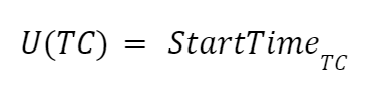

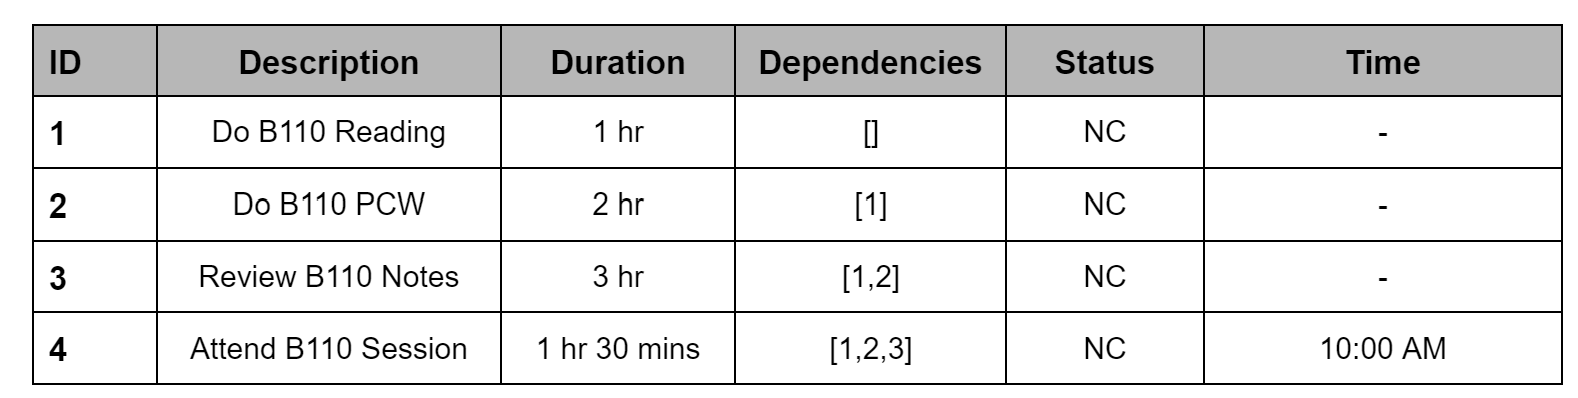
The dependency task must be done before the start time of time-constrained tasks. In the worst case, the dependencies can depend on themselves, so we can't execute the same utility value for all dependencies. As shown in the above table, to attend the B110 session, we must do the readings, do PCW, and review the notes consecutively. All these tasks depend on each other; having the same utility would be inefficient for prioritizing tasks. We will use the "number of dependencies" as an attribute for calculating the utility. As we have more dependencies, the task will have a higher utility value, which means lower priority. A default value of - 0.01 is used as the weight of the utility. The equation for the utility value of dependencies is calculated as follows:
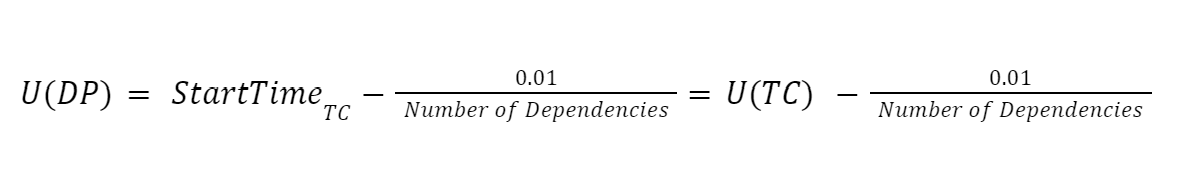

The utility value of time-constrained and dependency tasks are used in the time-constrained priority queue. The second priority queue takes the utility values of the flexible tasks. We don't have a fixed time or end time for flexible tasks, so we need to use another attribute for calculating the utility. The number of dependencies can be the only attribute relative to the utility of the flexible task because the dependencies must be done first before executing the flexible parent task. If we have two flexible tasks with the same dependencies, these tasks will be equally prioritized, which might not reflect the user's preference. We can use additional attributes for modifying the utility value based on the user's preference, such as category. However, we will use only the number of dependencies for simplicity.
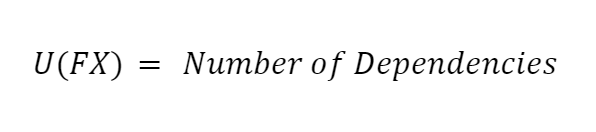

## **Benefits of Algorithm**

One main benefit of the algorithm is time optimization. The algorithm fills the time gaps between the current time and the next time-constrained task with the highest prioritized, flexible task, which reflects the real-world scenario for rational agents. For example, if it is 7:00 a.m. and I have a meeting at 10:00 a.m., it would be irrational to do nothing during this period if I have other tasks, so I have to fill it with other flexible tasks that fit this time gap. Therefore, the algorithm is an appropriate tool for those who seek to do their tasks as soon as possible.

The second benefit is its consideration of window tasks. These tasks are semi-flexible because they can be done anytime at a specific time range. The algorithm calculates the time gap between the current time and the end time of the window task. It will execute a flexible task if the time gap is sufficient for finishing it. Otherwise, it will immediately execute the window task. This benefit allows users to easily schedule their day by inputting tasks that don't strictly need to be done at a specific time.

The third benefit is its use of dependencies. If a task is dependent on others, the algorithm will consistently execute the dependency before its parent task, which ensures a logical flow of the tasks. Furthermore, the algorithm will execute the dependencies in the correct order regardless of how the user orders the task's dependencies because U(DP) ensures the higher number of dependencies will have a lower priority. Without dependencies, the algorithm will lose a vital attribute determining how the tasks should be scheduled.

Lastly, the schedule can be dynamically updated without inputting a new list of tasks. The user can add a new task or complete/delete the current one, and the algorithm will automatically reschedule the tasks. This benefit eases the use of the scheduler and creates a more realistic scheduler.

## **Limitations of Algorithm**

Let's consider the following test case: we have two flexible tasks, task 1 and task 2. Both tasks have the same utility value, but task 1 can not be executed in the current gap. Rationally, we should execute task 2 because it has the same utility value and can be executed in the current gap. However, the algorithm doesn't follow this procedure. It depends on the structure of the priority queue. If the task is on the top of the priority queue, it won't execute anything in the current gap. Instead, it will wait for a more expansive time gap to execute the task1. This problem can be solved by adding more attributes to the utility function, such as duration and category, which will give the flexible tasks more specific preference.




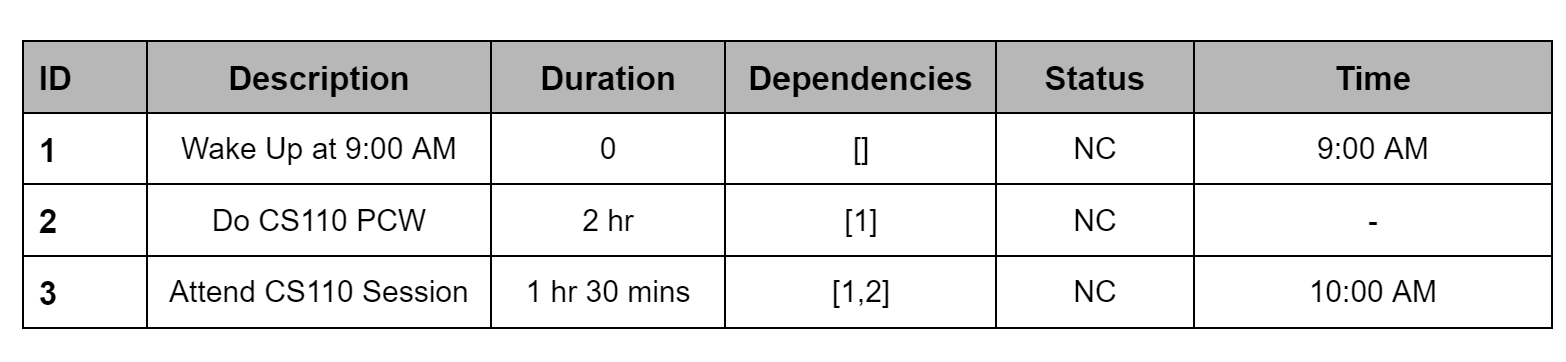
Another limitation is that it doesn't handle irrational user input. For example, in the above scheduler, task 2 overlaps with the fixed task 3 because task 2 is expected to end at 11:00 a.m., while fixed task 3 must start at 10:00 a.m. In this case, the algorithm ignores the overlap and will execute task 3 at its fixed time. As an improvement, these kinds of irrationality can be handled by returning an error asking the user to reschedule their tasks.


## **Complexity Analysis of Algorithm**

Analytically, the algorithm takes O(nlog(n)) for scheduling tasks. We can break down the operations of the run_scheduler() method into four:
1. **O(1)**: Constant time operations such as if conditions and assigning new variables.
2. **O(log(n))**: When we add a new task to the schedule, we must remove it from the queue. The algorithm uses a min heap, maintaining the parent element smaller than its children. In the deletion process, we can only delete the root node, which is the most prioritized task. Then, we must find the next minimum node as the new root element. The min-heap uses the heappop method for deletion. It starts by deleting the root node and swapping it with the right-most child in the heap. Then, the method iteratively swaps this child with its descendants if it has a greater value. This loop will terminate when the child is smaller than its descendant. In the worst case, the right-most child can be the maximum node in the heap, so we have to swap it back to the bottom level. Given that, the number of swaps is dependent on the depth of the heap. The depth of the heap is equal to log(n), in which n is the number of nodes. Therefore, the overall time is O(log(n)).
3. **O(n)**: we have two types of linear operations:


> > (a) **For-loops**: We use for-loops to calculate the utility of each task and append it to a list in the create_queue() method, which takes O(n) time.

> > (b) **Heapify**: After creating the utility lists, we must create the priority queue. The heapify() method converts the unsorted list into a min-heap. It assumes the list as an unsorted heap and iterates over all the parents. If the parent is larger than their children, it will swap it with the minimum child. The number of parent and swaps needed in the worst case are approximately (n/2) and log(n). Therefore, overall time of heapify equals “T(n) = O(n/2) + O(log(n)) = O(n/2) = O(n)”.

4. **O(nlog(n))**: Since we have to delete n tasks and each deletion takes O(log(n)). Then, the most expensive operation is O(nlog(n)).


Combining all these operations, we will have the following overall time of run_scheduler(): "T(n) = O(nlog(n)) + O(n) + O(log(n)) + O(1) = O(n)". According to the order of growth, the constant, logarithmic and linear growth operation will be significantly dominated by O(nlog(n)) in substantial inputs, so the final time complexity is O(nlog(n)).




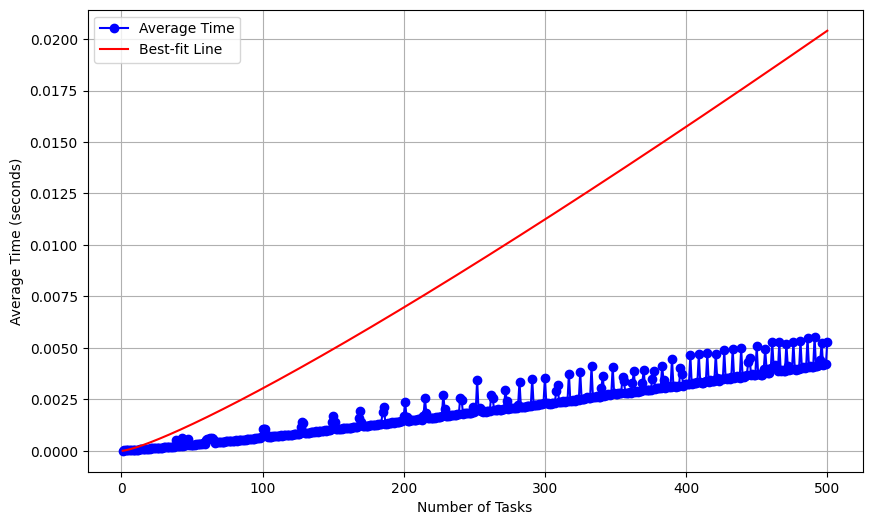

To verify the analytical analysis, we can plot how the time of the scheduler grows as we increase the number of tasks. The figure above shows how the time grows as the number of tasks increases from 1 to 500. As shown in the figure, the data points almost grow with the same scale as the best-fit line of nlog(n). All the data points are below the best-fit line, which means O(nlog(n)) is the upper bound of the algorithm. To minimize the noise, I took the average time of multiple runs for each input size. The experimental analysis supports the analytical analysis that the scheduler has a time complexity of O(nlog(n)), which means nlog(n) time growth rate as the number of inputs increases in very large inputs.


# **Video Explanation**

Here is the [link](https://www.canva.com/design/DAFzM34MjVo/2XXcxpHbTE5EGU1A8Ii6CA/view?utm_content=DAFzM34MjVo&utm_campaign=designshare&utm_medium=link&utm_source=editor) to the video explanation of algorithmic strategy.

# **Python Implmentation**

## **Min Heap Implementation**

### **Min Heap Class**

In [1]:
class min_heap:
    """
    A class for a minimum heap data structure that supports integers, floats, and tuples as elements.

    Attributes:
    - heap (list): A list representing the minimum heap.
    - heap_size (int): The current size of the heap.

    Methods:
    - __init__(self): Initializes an empty minimum heap.
    - left(self, i): Get the index of the left child of the node at index i.
    - right(self, i): Get the index of the right child of the node at index i.
    - parent(self, i): Get the index of the parent of the node at index i.
    - heappush(self, node): Push a node onto the heap while maintaining the heap property.
    - heapify(self, lst): Convert a list into a minimum heap and maintain the heap property.
    - heappop(self): Pop and return the minimum element from the heap while maintaining the heap property.
    - get_min(self): Get the minimum element in the heap.

    Supported Data Types for Elements:
    - Integers: int
    - Floating-Point Numbers: float
    - Tuples: tuple (Comparison based on the first element of the tuple)

    Note: This class assumes that elements are comparable within their respective data types.

    """

    def __init__(self):
        """
        Initialize an empty minimum heap.
        """
        self.heap = []
        self.heap_size = 0

    def left(self, i):
        """
        Get the index of the left child of the node at index i

        Args:
            i (int): Index of the node.

        Returns:
            int or None: Index of the left child or None if it doesn't exist.
        """
        if 2 * i + 1 > self.heap_size - 1:
            return None
        return 2 * i + 1

    def right(self, i):
        """
        Get the index of the right child of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int or None: Index of the right child or None if it doesn't exist.
        """
        if 2 * i + 2 > self.heap_size - 1:
            return None
        return 2 * i + 2

    def parent(self, i):
        """
        Get the index of the parent of the node at index i.

        Args:
            i (int): Index of the node.

        Returns:
            int or None: Index of the parent or None if it's the root node.
        """
        if i == 0:
            return None
        return (i - 1) // 2

    def heappush(self, node):
        """
        Push a node onto the minimum heap and maintain the heap property.
        Supported Data Types: intgers or float or tuples

        Args:
            node: The node to be added to the heap.
        """
        self.heap.append(node)
        self.heap_size += 1

        current_index = self.heap_size - 1
        while self.parent(current_index) is not None and ((isinstance(node, (int , float)) and self.heap[current_index] < self.heap[self.parent(current_index)]) or (isinstance(node, tuple) and self.heap[current_index][0] < self.heap[self.parent(current_index)][0])):
            # Swap with the parent if the current node is smaller
            self.heap[current_index], self.heap[self.parent(current_index)] = self.heap[self.parent(current_index)], self.heap[current_index]
            current_index = self.parent(current_index)

    def heapify(self, lst):
        """
        Convert a list into a minimum heap and maintain the heap property.
        Supported Data Types: intgers or float or tuples

        Args:
            lst (list): List to be converted into a minimum heap.
        """
        self.heap_size = len(lst)
        if self.parent(len(lst) - 1) is not None:
            # Iterate over the parents in the unsorted heap
            for index in range(self.parent(len(lst) - 1), -1, -1):
                current_index = index
                while self.left(current_index) is not None:
                    if self.right(current_index) is not None:
                        if ( isinstance(lst[0], (int , float)) and lst[self.right(current_index)] >= lst[self.left(current_index)] and lst[current_index] >= lst[self.left(current_index)]) or (isinstance(lst[0], tuple) and lst[self.right(current_index)][0] >= lst[self.left(current_index)][0] and lst[current_index][0] >= lst[self.left(current_index)][0]):
                            # Swap with the left child if it's smaller
                            lst[self.left(current_index)], lst[current_index] = lst[current_index], lst[self.left(current_index)]
                            current_index = self.left(current_index)
                        elif (isinstance(lst[0], (int , float)) and lst[self.left(current_index)] >= lst[self.right(current_index)] and lst[current_index] >= lst[self.right(current_index)]) or (isinstance(lst[0], tuple) and lst[self.left(current_index)][0] >= lst[self.right(current_index)][0] and lst[current_index][0] >= lst[self.right(current_index)][0] ):
                            # Swap with the right child if it's smaller
                            lst[self.right(current_index)], lst[current_index] = lst[current_index], lst[self.right(current_index)]
                            current_index = self.right(current_index)
                        else:
                            break
                    else:
                        if (isinstance(lst[0], (int , float)) and lst[current_index] >= lst[self.left(current_index)]) or (isinstance(lst[0], tuple) and lst[current_index][0] >= lst[self.left(current_index)][0]) :
                            # Swap with the left child if it's smaller
                            lst[self.left(current_index)], lst[current_index] = lst[current_index], lst[self.left(current_index)]
                            current_index = self.left(current_index)
                        else:
                            break
        self.heap = lst

    def heappop(self):
        """
        Pop and return the minimum element from the heap while maintaining the heap property.
        Supported Data Types: intgers or float or tuples

        Returns:
            Node or None: The minimum element in the heap, or None if the heap is empty.
        """
        if self.heap_size == 0:
            return None

        # Swap the root (smallest element) with the last element
        self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
        popped_item = self.heap.pop()
        self.heap_size -= 1

        current_index = 0
        while True:
            left_child_index = self.left(current_index)
            right_child_index = self.right(current_index)
            smallest = current_index

            # Compare with the left child
            if left_child_index is not None and ((isinstance(self.heap[0] , (int, float)) and self.heap[left_child_index] < self.heap[smallest]) or (isinstance(self.heap[0], tuple) and self.heap[left_child_index][0] < self.heap[smallest][0])):
                smallest = left_child_index

            # Compare with the right child
            if right_child_index is not None and ((isinstance(self.heap[0] , (int, float)) and self.heap[right_child_index] < self.heap[smallest]) or (isinstance(self.heap[0] , tuple) and self.heap[right_child_index][0] < self.heap[smallest][0])):
                smallest = right_child_index

            # If the smallest element is the current element, the heap property is satisfied
            if smallest == current_index:
                break

            self.heap[current_index], self.heap[smallest] = self.heap[smallest], self.heap[current_index]
            current_index = smallest
        return popped_item

    def get_min(self):
        """
        Get the minimum element in the heap.

        Returns:
            Node or None: The minimum element in the heap, or None if the heap is empty.
        """
        return self.heap[0]

### **Testing Min Heap**

In [2]:
def test_min_heap_heapify():
    """
    Test the heapify operation on a min-heap data structure.

    This function checks the correctness of the heapify operation by testing it with various input scenarios.

    1. Test heapify with duplicates.
    2. Test heapify with an empty list.
    3. Test heapify with negative numbers.
    4. Test heapify with a single number.

    The function asserts that the resulting heap matches the expected heap structure and size after the heapify operation.

    No return value; use assertions for testing.

    """
    # Test heapify with duplicates
    timed_lst = [5, 3, 7, 2, 5, 3]
    heap1 = min_heap()
    heap1.heapify(timed_lst)
    assert heap1.heap == [2, 3, 3, 5, 5, 7]
    assert heap1.heap_size == 6

    # Test heapify with an empty list
    flexible_lst = []
    heap2 = min_heap()
    heap2.heapify(flexible_lst)
    assert heap2.heap == []
    assert heap2.heap_size == 0

    # Test heapify with negative numbers
    lst3 = [-5, -3, -7, -2, -8]
    heap3 = min_heap()
    heap3.heapify(lst3)
    assert heap3.heap == [-8, -5, -7, -2, -3]
    assert heap3.heap_size == 5

    # Test heapify with a single number
    lst4 = [10]
    heap4 = min_heap()
    heap4.heapify(lst4)
    assert heap4.heap == [10]
    assert heap4.heap_size == 1

def test_min_heap_methods():
    """
    Test the methods of a min-heap data structure.

    This function tests the methods of a min-heap, including heappush, heappop, heapify, get_min, and their interactions.

    The function includes the following test cases:
    1. Create a min heap.
    2. Test heappush to add elements to the heap.
    3. Test heappop to remove the minimum element from the heap.
    4. Test heapify to convert a list into a min-heap.
    5. Test get_min to retrieve the minimum element from the heap.
    6. Test heappop after heapify to verify the min-heap property.

    The function includes assertions to ensure the correctness of the tested methods.

    No return value; use assertions for testing.
    """
    # Create a min heap
    heap = min_heap()

    # Test heappush
    heap.heappush(5)
    heap.heappush(3)
    heap.heappush(7)
    heap.heappush(2)
    assert heap.heap == [2, 3, 7, 5]
    assert heap.heap_size == 4

    # Test heappop
    assert heap.heappop() == 2
    assert heap.heap == [3, 5, 7]
    assert heap.heap_size == 3

    # Test heapify
    lst = [9, 4, 6, 2, 8, 5]
    heap.heapify(lst)
    assert heap.heap == [2, 4, 5, 9, 8, 6]
    assert heap.heap_size == 6

    # Test get_min
    assert heap.get_min() == 2

    # Test heappop after heapify
    assert heap.heappop() == 2
    assert heap.heap == [4, 6, 5, 9, 8]
    assert heap.heap_size == 5



test_min_heap_heapify()
test_min_heap_methods()


## **Designing a Scheduler Implementation**

### **Import Required Libraries**

In [3]:
import time
import math
import random
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt



### **Task Class**

In [4]:
class Task:
    def __init__(self, id, description, duration, dependencies= [], time=None , category= None):
        """
        Initialize a Task object.

        Args:
            id (int): The unique identifier for the task.
            description (str): A description of the task.
            duration (float): The duration of the task in hours.
            dependencies (list): A list of task IDs that this task depends on.
            time (int, float, or list): The start time or time window for the task.
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.time = time
        self.status = "NC"
        self.typ = "Flexible"

        if isinstance(time, (int, float)):
            self.typ = "Fixed"
        elif isinstance(time, list):
            self.typ = "Window"




### **Scheduler Class**

In [5]:
class Scheduler:
    """
    A class for managing and scheduling tasks.

    Attributes:
    - tasks (list): List of Task objects to be scheduled.
    - timed_lst (list): List of time-constrained tasks and their utilities.
    - flexible_lst (list): List of flexible tasks and their utilities.
    - scheduled_lst (list): List of scheduled tasks.
    - flexible_queue (min_heap): A priority queue for flexible tasks.
    - timed_queue (min_heap): A priority queue for time-constrained tasks.
    - scheduled_tasks (min_heap): A priority queue for scheduled tasks.
    - print_tasks (min_heap): A priority queue for tasks to be printed in the schedule.
    - completed_id (set): Set of task IDs that have been completed.
    - deleted_id (set): Set of task IDs that have been deleted.

    Methods:
    - __init__(self, tasks): Initializes the Scheduler with a list of tasks.
    - task_byid(self): Creates a mapping of tasks by their IDs.
    - has_dependencies(self, task): Checks if a task has dependencies and adjusts its utility based on dependencies.
    - create_queue(self): Creates timed and flexible task queues.
    - format_time(self, float_time): Formats time as HH:MM AM/PM.
    - format_duration(self, float_duration): Formats duration in hours and minutes.
    - run_scheduler(self, start_time): Runs the task scheduler starting from the given time.
    - print_scheduler(self): Prints the schedule of tasks.
    - next_task(self): Prints the next scheduled task.
    - update_tasks(self, new_task=None): Updates the list of tasks after adding or deleting tasks.
    - add_task(self, new_task): Adds a new task to the schedule.
    - delete_task(self): Deletes a task from the schedule.
    - complete(self): Marks the current task as completed.
    """

    def __init__(self, tasks):
        """
        Initialize the Scheduler with a list of tasks.

        Args:
            tasks (list): List of Task objects.
        """
        self.tasks = tasks
        self.timed_lst = []
        self.flexible_lst = []
        self.scheduled_lst = []
        self.flexible_queue = min_heap()
        self.timed_queue = min_heap()
        self.scheduled_tasks = min_heap()
        self.print_tasks = min_heap()
        self.completed_id = set()
        self.deleted_id = set()

    def task_byid(self):
        """
        Create a mapping of tasks by their IDs.
        """
        self.map = {}
        for task in self.tasks:
            self.map[task.id] = task

    def has_dependencies(self, task):
        """
        Check if a task has dependencies and adjust its utility based on dependencies.
        """
        if task.dependencies:
            for id in task.dependencies:
                if id not in self.completed_id and id not in self.deleted_id:
                    dependency = self.map[id]
                    if dependency.typ == "Flexible": #If the dependency task is flexible orginally, calculate the new utility value and add it to time_constrained list. Otherwise, stop the function.
                        start_time = task.time if task.typ == "Fixed" else task.time[0]
                        utility = start_time - (0.01 / (len(dependency.dependencies) + 1)) #Calculate the utility value of dependency task
                        self.flexible_tasks[id].typ = "Dependency"
                        self.timed_lst.append((utility, dependency))
                        del self.flexible_tasks[id]

    def create_queue(self):
        """
        Create timed and flexible task queues.
        """
        self.task_byid()
        self.flexible_tasks = self.map.copy() #Copy the map of all tasks to the flexible tasks map. While we are iterating over the tasks, we will filter the map from time-constrained and dependency tasks.

        for task in self.tasks:
            if task.typ == "Fixed" or task.typ == "Window":
                utility = task.time if task.typ == "Fixed" else task.time[0] #Calculate the utlity value of time-constrained tasks which is the start time
                self.timed_lst.append((utility, task))
                self.has_dependencies(task)
                del self.flexible_tasks[task.id] #Delete the time-constrained task from the flexible tasks map

        for task in self.flexible_tasks.values():
            utility = len(task.dependencies) #Calculate the utility value of the flexible task which in the number of dependencies
            self.flexible_lst.append((utility, task))

        self.timed_queue.heapify(self.timed_lst) #Create a priority queue for the time-constrained tasks
        self.flexible_queue.heapify(self.flexible_lst) #Create a priority queue for the flexible tasks

    def format_time(self, float_time):
        """
        Format time as HH:MM AM/PM.

        Args:
            float_time (float): Time in floating-point format.

        Returns:
            str: Formatted time string.
        """
        if float_time is not None:
            hours = int(float_time)
            minutes = int((float_time - hours) * 60)
            am_pm = "AM"

            if hours >= 24:
                hours = hours - 24 * (hours // 24)

            if hours >= 12:
                am_pm = "PM"

            if hours == 0:
                hours = 12
            elif hours > 12:
                hours -= 12
            return f"{hours:02}:{minutes:02} {am_pm}"
        else:
            return "N/A"

    def format_duration(self, float_duration):
        """
        Format duration in hours and minutes.

        Args:
            float_duration (float): Duration in floating-point format (hours).

        Returns:
            str: Formatted duration string.
        """
        hours = int(float_duration)
        minutes = int((float_duration - hours) * 60)

        duration_str = ""
        if hours > 0:
            duration_str += f"{hours} hr "
        if minutes > 0:
            duration_str += f"{minutes} mins"

        return duration_str.strip()  # Remove trailing space if there are no minutes

    def run_scheduler(self, start_time):
        """
        Run the task scheduler starting from the given time.

        Args:
            start_time (float): Start time in floating-point format.
        """
        self.create_queue()
        self.current_time = start_time
        self.real_time = start_time

        def add_flexible_task(flexible_task): #Define a function for adding flexible tasks to the schedule
            self.scheduled_lst.append((self.current_time, flexible_task))
            self.current_time += flexible_task.duration
            self.flexible_queue.heappop()

        while self.timed_queue.heap_size != 0:
            timed_task = self.timed_queue.get_min()[1]
            if timed_task.typ == "Fixed":
                # If the time gap between current time and start time of fixed task is sufficient for a flexible task, add flexible task to schedule. Otherwise, add the fixed task to schedule.
                if self.flexible_queue.heap_size != 0 and timed_task.time - self.current_time > self.flexible_queue.get_min()[1].duration:
                    add_flexible_task(self.flexible_queue.get_min()[1])
                else:
                    self.scheduled_lst.append((timed_task.time, timed_task))
                    self.current_time = timed_task.time + timed_task.duration
                    self.timed_queue.heappop()
            elif timed_task.typ == "Window":
                # If the time gap between current time and end time of fixed task is sufficient for a flexible task, add flexible task to schedule. Otherwise, add the fixed task to schedule.
                if self.flexible_queue.heap_size != 0 and timed_task.time[1] - self.current_time > self.flexible_queue.get_min()[1].duration:
                    add_flexible_task(self.flexible_queue.get_min()[1])
                else:
                    self.scheduled_lst.append((self.current_time, timed_task))
                    if self.current_time > timed_task.time[0]:
                        self.current_time += timed_task.duration
                    else:
                        self.current_time = timed_task.time[0] + timed_task.duration
                    self.timed_queue.heappop()
            else:
                self.scheduled_lst.append((self.current_time, timed_task))
                self.current_time += timed_task.duration
                self.timed_queue.heappop()

        #Add the flexible tasks to the scheduled list if we have no longer time-constrained tasks
        while self.flexible_queue.heap_size != 0:
            add_flexible_task(self.flexible_queue.get_min()[1])

        #Create a priority queue for the scheduler
        self.scheduled_tasks.heap = self.scheduled_lst
        self.scheduled_tasks.heap_size = len(self.scheduled_lst)

    def print_scheduler(self):
        """
        Print the schedule of tasks.
        """
        self.print_tasks.heap = self.scheduled_tasks.heap.copy()
        self.print_tasks.heap_size = self.scheduled_tasks.heap_size
        total_duration = 0
        deleted = []
        print("---------------------------------------------------------")
        print("📅 Your Schedule for Today's Tasks 📅")
        while self.print_tasks.heap_size != 0:
            task = self.print_tasks.get_min()
            print("⏰", self.format_time(task[0]))
            type_to_color = {"Fixed": "🔵", "Window": "🟣", "Flexible": "🟡", "Dependency": "🔴"} #Color Code different types of tasks
            print(f"\t {type_to_color[task[1].typ]} {task[1].description}, ⏱️ {self.format_duration(task[1].duration)}")
            print(f"\t ✅ Finished by {self.format_time(task[0] + task[1].duration)}")
            total_duration += task[1].duration
            deleted.append(task)
            self.print_tasks.heappop()

        self.print_tasks.heap = deleted
        self.print_tasks.heap_size = len(deleted)

        print(f"🏁 Total Tasks Duration is {self.format_duration(total_duration)}")
        print("---------------------------------------------------------")

    def next_task(self):
        """
        Print the next scheduled task.
        """
        print(f"⏭️ Next Task '{self.scheduled_tasks.get_min()[1].description}' at {self.format_time(self.scheduled_tasks.get_min()[0])} for {self.format_duration(self.scheduled_tasks.get_min()[1].duration)}")

    def update_tasks(self, new_task=None):
        """
        Update the list of tasks, after adding or deleting tasks.

        Args:
            new_task (Task, optional): Task to add to the schedule.
        """
        tasks = []
        while self.scheduled_tasks.heap:
            popped_task = self.scheduled_tasks.heappop()[1]
            if isinstance(popped_task.time, (int, float)):
                popped_task.typ = "Fixed"
            elif isinstance(popped_task.time, list):
                popped_task.typ = "Window"
            else:
                popped_task.typ = "Flexible"
            if new_task is None or popped_task.id != new_task.id:
                tasks.append(popped_task)

        if new_task is not None:
            tasks.append(new_task)

        self.tasks = tasks
        self.run_scheduler(self.real_time) #Create a new scheduler after adding or removing a task

    def add_task(self, new_task):
        """
        Add a new task to the schedule.

        Args:
            new_task (Task): Task to add to the schedule.
        """
        self.update_tasks(new_task)
        print(f"⭐ Task '{new_task.description}' is Added ⭐")

    def delete_task(self):
        """
        Delete a task from the schedule.
        """
        _, task = self.scheduled_tasks.heappop()
        self.deleted_id.add(task.id)
        self.update_tasks()
        print(f"🗑️ Task '{task.description}' is Deleted 🗑️")

    def complete(self):
        """
        Mark the current task as completed.
        """
        task = self.scheduled_tasks.get_min()[1]
        task.status = "C"
        self.real_time = self.scheduled_tasks.get_min()[0] + task.duration
        self.completed_id.add(task.id)
        self.scheduled_tasks.heappop()
        self.print_tasks.heappop()
        print(f"✅ Task '{task.description}' is Completed ✅ Great Job 🎉 It is {self.format_time(self.real_time)} Now ⏰")


### **Scheduler Test Cases**


#### **Test Case 1**

In [6]:
# Task Case 1: Sort a typical day in my life and apply different methods of the class

tasks = [
    Task(id=9, description="Go to Seoul Museum of History", duration=3, dependencies=[8],  time= 17),
    Task(id=3, description="Do CS110 PCW", duration=2),
    Task(id=2, description="Do the Morning Religious Practices", duration=2, time=[5.5 , 6.5]),
    Task(id=10, description="Go to Namsan Tower", duration=2, time=[19 , 21]),
    Task(id=6, description="Learn Coding", duration=1, dependencies=[5]),
    Task(id=4, description="Attend CS110 Session", duration=1.5, dependencies=[3] , time= 10),
    Task(id=8, description="Meet your Cultural Buddy", duration=1, time = 16),
    Task(id=5, description="Apply for Internships", duration=2),
    Task(id=1, description="Wake Up", duration=0.1667, time= 5),
    Task(id=7, description="Eat your Lunch", duration=0.5,time=[12, 15])
]




scheduler = Scheduler(tasks)

scheduler.run_scheduler(5)
scheduler.print_scheduler()

scheduler.next_task()
scheduler.complete()
scheduler.next_task()
scheduler.complete()
scheduler.next_task()
scheduler.complete()

scheduler.print_scheduler()

scheduler.add_task(Task(id=11, description="Read Quran", duration=2))
scheduler.print_scheduler()

scheduler.next_task()
scheduler.delete_task()

scheduler.print_scheduler()



---------------------------------------------------------
📅 Your Schedule for Today's Tasks 📅
⏰ 05:00 AM
	 🔵 Wake Up, ⏱️ 10 mins
	 ✅ Finished by 05:10 AM
⏰ 05:10 AM
	 🟣 Do the Morning Religious Practices, ⏱️ 2 hr
	 ✅ Finished by 07:10 AM
⏰ 07:30 AM
	 🔴 Do CS110 PCW, ⏱️ 2 hr
	 ✅ Finished by 09:30 AM
⏰ 10:00 AM
	 🔵 Attend CS110 Session, ⏱️ 1 hr 30 mins
	 ✅ Finished by 11:30 AM
⏰ 11:30 AM
	 🟡 Apply for Internships, ⏱️ 2 hr
	 ✅ Finished by 01:30 PM
⏰ 01:30 PM
	 🟡 Learn Coding, ⏱️ 1 hr
	 ✅ Finished by 02:30 PM
⏰ 02:30 PM
	 🟣 Eat your Lunch, ⏱️ 30 mins
	 ✅ Finished by 03:00 PM
⏰ 04:00 PM
	 🔵 Meet your Cultural Buddy, ⏱️ 1 hr
	 ✅ Finished by 05:00 PM
⏰ 05:00 PM
	 🔵 Go to Seoul Museum of History, ⏱️ 3 hr
	 ✅ Finished by 08:00 PM
⏰ 08:00 PM
	 🟣 Go to Namsan Tower, ⏱️ 2 hr
	 ✅ Finished by 10:00 PM
🏁 Total Tasks Duration is 15 hr 10 mins
---------------------------------------------------------
⏭️ Next Task 'Wake Up' at 05:00 AM for 10 mins
✅ Task 'Wake Up' is Completed ✅ Great Job 🎉 It is 05:10 

#### **Test Case 2**

In [7]:
#Test Case 2: Prove that the scheduler prioritizes tasks based on utility value, not the user's input.

tasks = [
    Task(id=1, description="Wake Up", duration=0.25, time=6),
    Task(id=2, description="Morning Exercise", duration=1, time=[6.5, 7.5]),
    Task(id=3, description="Breakfast", duration=0.5, time=[7, 7.5], dependencies=[1]),
    Task(id=4, description="Get Ready for Work", duration=0.75, time=[7.5, 8.25], dependencies=[1]),
    Task(id=5, description="Commute to Work", duration=1, dependencies=[3, 4]),
    Task(id=6, description="Work on Project A", duration=2, time=[9, 11], dependencies=[5]),
    Task(id=7, description="Lunch Break", duration=0.5, time=[12, 12.5], dependencies=[6]),
    Task(id=8, description="Work on Project B", duration=2, time=[13, 15], dependencies=[7]),
    Task(id=9, description="Afternoon Meeting", duration=1, time=[15, 16], dependencies=[8]),
    Task(id=10, description="Go for a Run", duration=1, time=[18, 19], dependencies=[9])
] #A sorted list of tasks



def shuffle_tasks(task_list):
    """
    Shuffle the order of tasks in a given list.

    Args:
    task_list (list): A list containing tasks to be shuffled.

    Returns:
    list: A new list with the same tasks as the input list but in a randomized order.

    """
    shuffled_list = task_list.copy()  # Create a copy of the original list
    random.shuffle(shuffled_list)  # Shuffle the copy
    return shuffled_list


tasks1_shuffled = shuffle_tasks(tasks) #Shuffle the tasks for scheduler 1
tasks2_shuffled = shuffle_tasks(tasks) #Shuffle the tasks for scheduler 2

scheduler1 = Scheduler(tasks1_shuffled)
scheduler2 = Scheduler(tasks2_shuffled)
scheduler1.run_scheduler(5)
scheduler2.run_scheduler(5)

assert(scheduler1.scheduled_tasks == scheduler1.scheduled_tasks) #Assert if the two schedulers have the same output
scheduler1.print_scheduler()

---------------------------------------------------------
📅 Your Schedule for Today's Tasks 📅
⏰ 06:00 AM
	 🔵 Wake Up, ⏱️ 15 mins
	 ✅ Finished by 06:15 AM
⏰ 06:15 AM
	 🟣 Morning Exercise, ⏱️ 1 hr
	 ✅ Finished by 07:15 AM
⏰ 07:30 AM
	 🟣 Breakfast, ⏱️ 30 mins
	 ✅ Finished by 08:00 AM
⏰ 08:00 AM
	 🟣 Get Ready for Work, ⏱️ 45 mins
	 ✅ Finished by 08:45 AM
⏰ 08:45 AM
	 🔴 Commute to Work, ⏱️ 1 hr
	 ✅ Finished by 09:45 AM
⏰ 09:45 AM
	 🟣 Work on Project A, ⏱️ 2 hr
	 ✅ Finished by 11:45 AM
⏰ 11:45 AM
	 🟣 Lunch Break, ⏱️ 30 mins
	 ✅ Finished by 12:15 PM
⏰ 12:30 PM
	 🟣 Work on Project B, ⏱️ 2 hr
	 ✅ Finished by 02:30 PM
⏰ 03:00 PM
	 🟣 Afternoon Meeting, ⏱️ 1 hr
	 ✅ Finished by 04:00 PM
⏰ 04:00 PM
	 🟣 Go for a Run, ⏱️ 1 hr
	 ✅ Finished by 05:00 PM
🏁 Total Tasks Duration is 10 hr
---------------------------------------------------------


### **Complexity Analysis**

#### **Random Task Generator**

In [8]:
class TaskGenerator:
    """
    A class for generating random tasks for a task scheduler.

    Attributes:
    - num_tasks (int): The number of tasks to generate.

    Methods:
    - __init__(self, num_tasks): Initializes the TaskGenerator with the number of tasks to generate.
    - generate_random_task(self, task_id, all_tasks): Generates a random task with a given task_id and dependencies.
    - generate_random_tasks(self): Generates a list of random tasks based on the specified number of tasks.
    """

    def __init__(self, num_tasks):
        """
        Initialize a TaskGenerator object with the number of tasks to generate.

        Args:
            num_tasks (int): The number of tasks to generate.
        """
        self.num_tasks = num_tasks

    def generate_random_task(self, task_id, all_tasks):
        """
        Generate a random task with the specified task_id and dependencies.

        Args:
            task_id (int): The unique identifier for the task.
            all_tasks (list of Task): A list of all previously generated tasks to check dependencies.

        Returns:
            Task: A randomly generated task with the specified task_id, description, duration, dependencies, and time.
        """
        # Randomly select the task type (Fixed, Flexible, Window)
        task_type = random.choice(["Fixed", "Flexible", "Window"])

        # Generate a random description for the task
        description = f"Task {task_id}"

        # Generate a random duration for the task (between 1 and 8 hours)
        duration = round(random.uniform(1.0, 8.0), 2)

        # Generate a list of random dependencies (0 to 2 dependencies)
        num_dependencies = min(task_id - 1, random.randint(0, 2))
        dependencies = random.sample(range(1, task_id), num_dependencies)

        # Ensure that dependencies are valid and not already completed
        for dep_task_id in dependencies:
            if all_tasks[dep_task_id - 1].status == "C":
                dependencies.remove(dep_task_id)

        # Generate a random time or time window for the task
        if task_type == "Fixed":
            time = round(random.uniform(8.0, 20.0), 2)  # Fixed time (between 8:00 AM and 8:00 PM)
        elif task_type == "Window":
            start_time = round(random.uniform(8.0, 16.0), 2)  # Window start time (between 8:00 AM and 4:00 PM)
            end_time = start_time + round(random.uniform(1.0, 4.0), 2)  # Window duration (1 to 4 hours)
            time = [start_time, end_time]
        else:
            time = None  # Flexible tasks have no specific time

        return Task(task_id, description, duration, dependencies, time)

    def generate_random_tasks(self):
        """
        Generate a list of random tasks based on the specified number of tasks.

        Returns:
            list of Task: A list of randomly generated tasks based on the specified number of tasks.

        """
        tasks = []
        for task_id in range(1, self.num_tasks + 1):
            task = self.generate_random_task(task_id, tasks)
            tasks.append(task)
        return tasks


#### **Plotting Time Complexity**

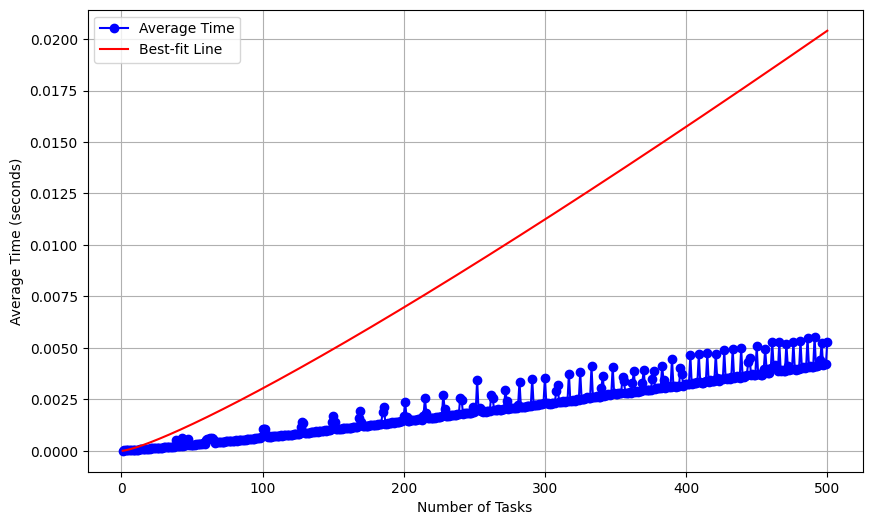

In [154]:
def plot(n):
    """
    Generate a plot to analyze the algorithm's time complexity with varying numbers of tasks.

    Args:
        n (int): The maximum number of tasks to consider in the analysis.

    Returns:
        None
    """
    tasks_size = []
    averaged_time = []
    best_line = []

    for i in range(1, n + 1):
        task_time = []
        #To minimize numerical noise, do mutiple runs on "run_scheduler" with same number of tasks
        for x in range(300):
            num_random_tasks = i
            task_generator = TaskGenerator(num_random_tasks)
            random_tasks = task_generator.generate_random_tasks()

            start_time = time.time()
            scheduler = Scheduler(random_tasks)
            scheduler.run_scheduler(0)
            end_time = time.time()

            task_time.append(end_time - start_time)

        tasks_size.append(i)
        averaged_time.append(sum(task_time) / len(task_time))

    c = averaged_time[2]  #Average Constant Time for One Operation -> nlog(n) = 1 -> n = 3 -> index: 2

    for i in range(1 , n + 1):
      best_line.append(i * math.log10(i) * c ) #Multiply the number of operations by average constant time to plot Best-fit line of nlog(n)

    plt.figure(figsize=(10, 6))  # Set figure size

    plt.plot(tasks_size, averaged_time, marker='o', linestyle='-', color='b', label='Average Time')
    plt.plot(tasks_size,best_line,  linestyle='-', color='r', label='Best-fit Line')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Average Time (seconds)')
    plt.legend()
    plt.grid(True)


plot(500)
